In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import preprocessing
from sklearn import decomposition
import matplotlib.animation as animation
from sklearn.cluster import KMeans
from scipy.spatial import distance
from sklearn.metrics import silhouette_score
from pyclustertend import hopkins
import seaborn as sns
from scipy.stats import kruskal

## Reading data from CSV 

In [2]:
# The Silent Wanderers
non_learners = [14.0,15.0,18.0,20.0,21.0,26.0] #non-learners 

In [3]:
## Reading data
behavioral_data = pd.read_csv('path/to/dataset.csv')
behavioral_data=behavioral_data.drop('Unnamed: 0',axis=1)
behavioral_data=behavioral_data.dropna()
behavioral_data=behavioral_data[behavioral_data['team'].isin(non_learners)]

behavioral_data

,team,time_in_secs,window,T_add,T_remove,T_ratio_add_del,T_action,T_hist,T_help,T1_T1_rem,...,at_partner,at_robot,other,T_speech,T_silence,T_overlap,T_short_pauses,T_long_pauses,T_overlap_over_speech,normalized_time
990,14.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.500000,4.000000,0.000000,2.102102,99.099099,0.900901,0.000000,0.000000,42.857143,0.005618
991,14.0,20.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.333333,12.666667,1.000000,5.855856,95.795796,4.204204,7.692308,0.000000,71.794872,0.011236
992,14.0,30.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.500000,12.666667,9.666667,0.600601,98.798799,0.000000,0.000000,0.000000,0.000000,0.016854
993,14.0,40.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.333333,1.500000,11.666667,1.051051,97.897898,0.000000,0.000000,0.000000,0.000000,0.022472
994,14.0,50.0,5.0,2.0,0.0,10.0,2.0,0.0,0.0,0.0,...,1.666667,0.000000,0.000000,3.453453,99.099099,0.000000,13.043478,0.000000,0.000000,0.028090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498,26.0,1570.0,157.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.333333,0.000000,0.000000,45.795796,48.948949,34.534535,5.245902,0.000000,75.409836,0.975155
2499,26.0,1580.0,158.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.000000,1.500000,0.000000,44.594595,55.555556,34.534535,3.703704,17.508418,77.441077,0.981366
2500,26.0,1590.0,159.0,2.0,0.0,10.0,5.0,0.0,0.0,0.0,...,5.666667,0.000000,0.000000,59.009009,35.735736,48.348348,9.414758,0.000000,81.933842,0.987578
2501,26.0,1600.0,160.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,8.333333,13.666667,0.000000,67.267267,25.225225,56.756757,6.696429,0.000000,84.375000,0.993789


In [4]:
## Separating the metadata
meta_data=behavioral_data.loc[:,'team':'window']
team_id = behavioral_data.loc[:,'team']

In [5]:
## Separating features and their columns' names
features = behavioral_data.loc[:,'T_add':'normalized_time']
columns= features.columns

## Standarizing data

In [8]:
## Normalizing behavioral features wit a MinMax Scaler
def standarize(df):
    standardiser = preprocessing.MinMaxScaler()
    data = standardiser.fit_transform(df)
    df =pd.DataFrame(data,columns= df.columns)
    return df

In [9]:
## Standarized data
std_features=standarize(features)
std_features

,T_add,T_remove,T_ratio_add_del,T_action,T_hist,T_help,T1_T1_rem,T1_T1_add,T1_T2_rem,T1_T2_add,...,at_partner,at_robot,other,T_speech,T_silence,T_overlap,T_short_pauses,T_long_pauses,T_overlap_over_speech,normalized_time
0,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.068878,0.066482,0.000000,0.022727,0.990132,0.015,0.000000,0.000000,0.453237,0.000184
1,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.127551,0.210526,0.029126,0.074380,0.953947,0.070,0.176471,0.000000,0.759270,0.005833
2,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.176020,0.210526,0.281553,0.002066,0.986842,0.000,0.000000,0.000000,0.000000,0.011482
3,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.066327,0.024931,0.339806,0.008264,0.976974,0.000,0.000000,0.000000,0.000000,0.017130
4,0.5,0.0,1.0,0.1250,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.025510,0.000000,0.000000,0.041322,0.990132,0.000,0.299233,0.000000,0.000000,0.022779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,0.0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.005102,0.000000,0.000000,0.623967,0.440789,0.575,0.120347,0.000000,0.797500,0.975020
929,0.0,0.5,0.0,0.0625,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.024931,0.000000,0.607438,0.513158,0.575,0.084967,0.057239,0.818981,0.981265
930,0.5,0.0,1.0,0.3125,0.000000,0.0,0.0,0.0,0.0,1.0,...,0.086735,0.000000,0.000000,0.805785,0.296053,0.805,0.215986,0.000000,0.866495,0.987510
931,0.0,0.0,0.0,0.0625,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.127551,0.227147,0.000000,0.919421,0.180921,0.945,0.153624,0.000000,0.892311,0.993755


## PCA

In [10]:
def PCA(df,n_components=columns.shape[0]):
    pca = decomposition.PCA(n_components=n_components)
    data=pca.fit_transform(df)
    df=pd.DataFrame(data)
    return df,pca.explained_variance_ratio_

In [11]:
PCAfeatures,varRatio= PCA(std_features)

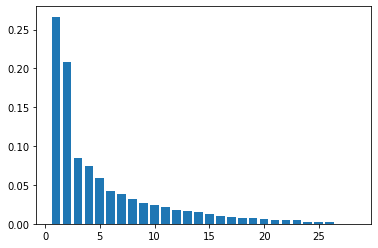

In [12]:
fig,ax = plt.subplots()
x = np.arange(1,varRatio.shape[0]+1,step=1)
ax.bar(x,varRatio)
plt.show()

In [13]:
# We take the first 5 components
features_afterPCA,var = PCA(std_features, n_components=5)
features_afterPCA

,0,1,2,3,4
0,-0.084742,-0.695006,-0.096251,-0.117986,-0.390267
1,-0.168239,-0.501820,-0.097739,-0.294546,-0.316081
2,-0.047033,-0.924240,0.022270,-0.149376,0.007762
3,-0.027216,-0.889810,-0.080236,-0.135014,0.047603
4,0.997290,-0.575122,0.225058,-0.042527,-0.247622
...,...,...,...,...,...
928,-0.423548,0.612064,-0.396671,0.231332,-0.153145
929,-0.440649,0.600455,-0.563978,0.370401,-0.237859
930,0.494944,1.208784,0.100316,0.089644,-0.192302
931,-0.690176,1.027132,0.298307,-0.061450,-0.059475


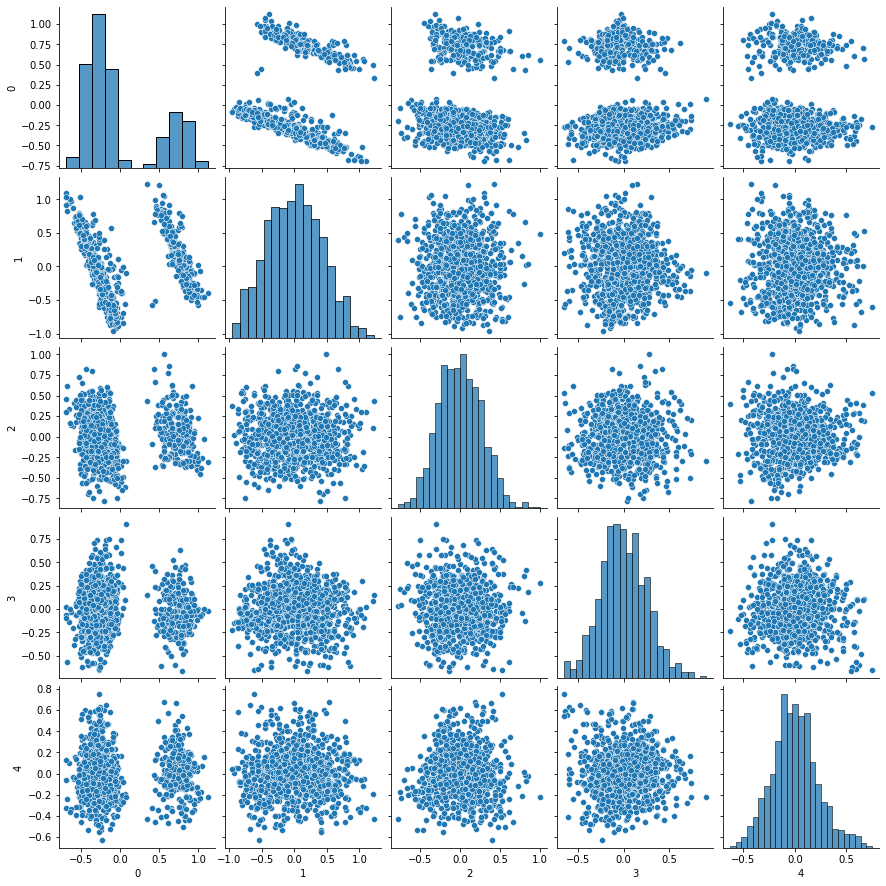

In [14]:
sns.pairplot(features_afterPCA)

## K-Means Clustering

In [15]:
# K-means clustering with k from [1,10]
# compute  inertia and silhouette_scores to choose optimal k
sse = []
s_score=[]
list_k = np.arange(1,10)
for k in list_k:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features_afterPCA)
    labels = kmeans.labels_
    sse.append(kmeans.inertia_)
    if(k!=1):
        s_score.append(silhouette_score(features_afterPCA,labels))


    

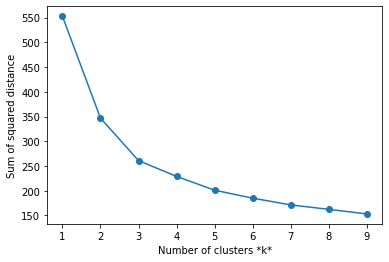

In [17]:
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

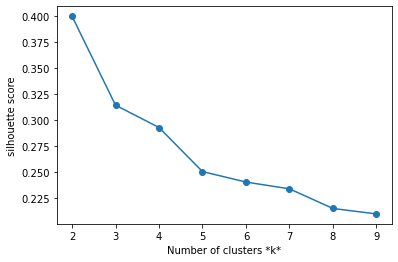

In [18]:
plt.plot(np.arange(2,10), s_score, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('silhouette score');

We can conclude that there are 3 clusters

In [19]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(features_afterPCA)
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

In [20]:
cluster_centers

array([[ 0.7369891 ,  0.17872628,  0.04242509, -0.0141726 ,  0.00556913],
       [-0.17494777, -0.40648379, -0.00378405,  0.02313566, -0.00885842],
       [-0.38939254,  0.27287686, -0.02875857, -0.0124597 ,  0.00466122]])

In [21]:
## features and their labels
clustered_features=pd.DataFrame(std_features)
clustered_features = clustered_features.assign(label=pd.Series(labels).values)
clustered_features = clustered_features.assign(team=pd.Series(team_id).values)

In [22]:
## size per cluster
clusters= clustered_features.groupby('label')
size_per_cluster =clusters.size()

In [23]:
## conditional means
mk = clusters.mean()
mk

,T_add,T_remove,T_ratio_add_del,T_action,T_hist,T_help,T1_T1_rem,T1_T1_add,T1_T2_rem,T1_T2_add,...,at_robot,other,T_speech,T_silence,T_overlap,T_short_pauses,T_long_pauses,T_overlap_over_speech,normalized_time,team
label,,,,,,,,,,,,,,,,,,,,,
0,0.313953,0.000000,1.000000,0.112161,0.014212,0.005426,0.000000,0.007752,0.000000,0.015504,...,0.023857,0.060548,0.426293,0.676204,0.223527,0.13642,0.017051,0.378452,0.478580,18.453488
1,0.022861,0.082596,0.008850,0.048488,0.012291,0.021829,0.029499,0.000000,0.020649,0.005900,...,0.049526,0.059054,0.276335,0.798993,0.094248,0.16227,0.030523,0.263846,0.360561,19.209440
2,0.015625,0.087798,0.006101,0.043899,0.022321,0.008929,0.017857,0.000000,0.035714,0.002976,...,0.033422,0.067614,0.603773,0.514323,0.427381,0.13686,0.012657,0.598325,0.657815,18.369048


In [25]:
clusterArray=[]
cluster0 = clusters.get_group(0).drop('label',axis='columns')
clusterArray.append(cluster0)


In [26]:
cluster1 = clusters.get_group(1).drop('label',axis='columns')
clusterArray.append(cluster1)

In [27]:
cluster2= clusters.get_group(2).drop('label',axis='columns')
clusterArray.append(cluster2)

In [28]:
## Kruskal-Wallis Test
clus01=[]
clus02=[]
clus12=[]
for feature in columns:
    try:
        clus01.append((feature,kruskal(clusterArray[0][feature],clusterArray[1][feature]).pvalue))
    except:    
        print(feature+' neglected')
    try :
        clus02.append((feature,kruskal(clusterArray[0][feature],clusterArray[2][feature]).pvalue))
    except :
        print(feature+' neglected')
    try:
        clus12.append((feature,kruskal(clusterArray[1][feature],clusterArray[2][feature]).pvalue))
    except:
        print(feature+' neglected')
        


T1_T1_add neglected
smile neglected


In [29]:
## sorted by ascendant p-value/// features with pvalue > threshold are marked with xx
threshold=0.01
print (' ---- for cluster 0 and cluster 1 :')
for pair in clus01:
    ind=''
    if(pair[1]>threshold):
        ind=' xx '
    print(' ------'+ind+' feature:'+str(pair[0])+'  || pvalue : '+str(pair[1]))
    
print ('\n ---- for cluster 0 and cluster 2 :')
for pair in clus02:
    ind=''
    if(pair[1]>threshold):
        ind=' xx '
    print(' ------'+ind+' feature:'+str(pair[0])+'  || pvalue : '+str(pair[1]))
print ('\n ---- for cluster 1 and cluster 2 :')
for pair in clus12:
    ind=''
    if(pair[1]>threshold):
        ind=' xx '
    print(' ------'+ind+' feature:'+str(pair[0])+'  || pvalue : '+str(pair[1]))
## bar plot: 1 bar plot for features that are siginficantly different, ...

 ---- for cluster 0 and cluster 1 :
 ------ feature:T_add  || pvalue : 1.0387205039727556e-104
 ------ feature:T_remove  || pvalue : 4.809832820774132e-11
 ------ feature:T_ratio_add_del  || pvalue : 8.715586953438492e-126
 ------ feature:T_action  || pvalue : 3.150690753964416e-35
 ------ xx  feature:T_hist  || pvalue : 0.9849052922951297
 ------ xx  feature:T_help  || pvalue : 0.011058384006310236
 ------ feature:T1_T1_rem  || pvalue : 0.005439181561911727
 ------ xx  feature:T1_T1_add  || pvalue : 0.10470837421758752
 ------ xx  feature:T1_T2_rem  || pvalue : 0.020350079114380637
 ------ xx  feature:T1_T2_add  || pvalue : 0.24423897658642046
 ------ feature:redundant_exist  || pvalue : 2.2488388368733554e-07
 ------ xx  feature:positive  || pvalue : 0.8293405396542205
 ------ xx  feature:negative  || pvalue : 0.041394403526889376
 ------ xx  feature:arousal  || pvalue : 0.16568295620785217
 ------ xx  feature:positive_minus_negative  || pvalue : 0.6251432053683905
 ------ xx  featur

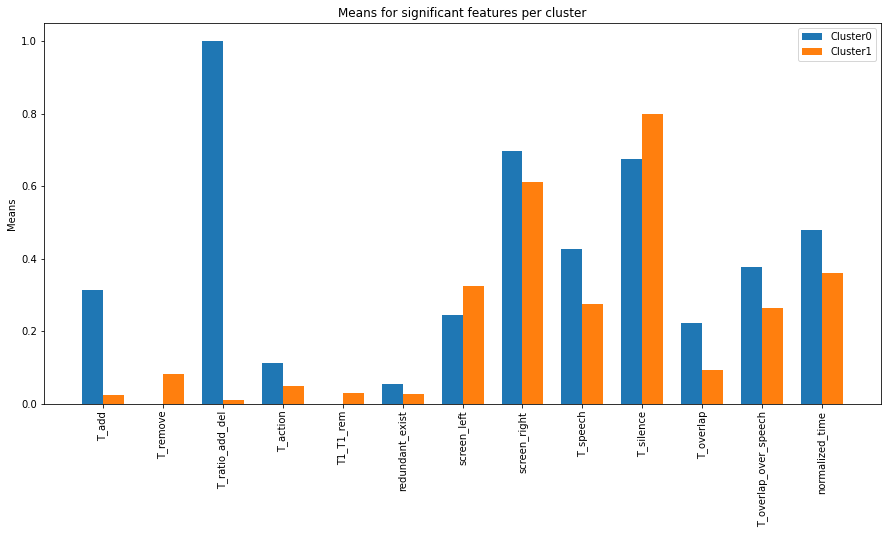

In [30]:
significant_feature01 =list(map(lambda c: c[0],list(filter(lambda pt: pt[1]<threshold,clus01))))
mean0=list()
mean1=list()
for ft in significant_feature01:
    mean0.append(mk[ft][0])
    mean1.append(mk[ft][1])
x = np.arange(len(significant_feature01))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,7))
rects1 = ax.bar(x - width/2, mean0, width, label='Cluster0')
rects2 = ax.bar(x + width/2, mean1, width, label='Cluster1')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Means')
ax.set_title('Means for significant features per cluster')
ax.set_xticks(x)
ax.set_xticklabels(significant_feature01)
plt.xticks(rotation=90)
ax.legend()


plt.show()


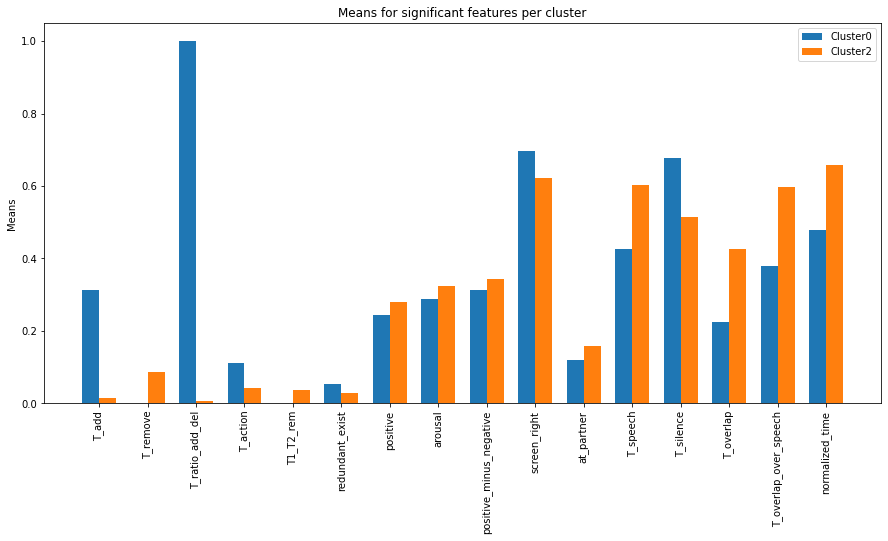

In [31]:

significant_feature02 =list(map(lambda c: c[0],list(filter(lambda pt: pt[1]<threshold,clus02))))
mean0=list()
mean2=list()
for ft in significant_feature02:
    mean0.append(mk[ft][0])
    mean2.append(mk[ft][2])
x = np.arange(len(significant_feature02))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,7))
rects1 = ax.bar(x - width/2, mean0, width, label='Cluster0')
rects2 = ax.bar(x + width/2, mean2, width, label='Cluster2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Means')
ax.set_title('Means for significant features per cluster')
ax.set_xticks(x)
ax.set_xticklabels(significant_feature02)
plt.xticks(rotation=90)
ax.legend()


plt.show()

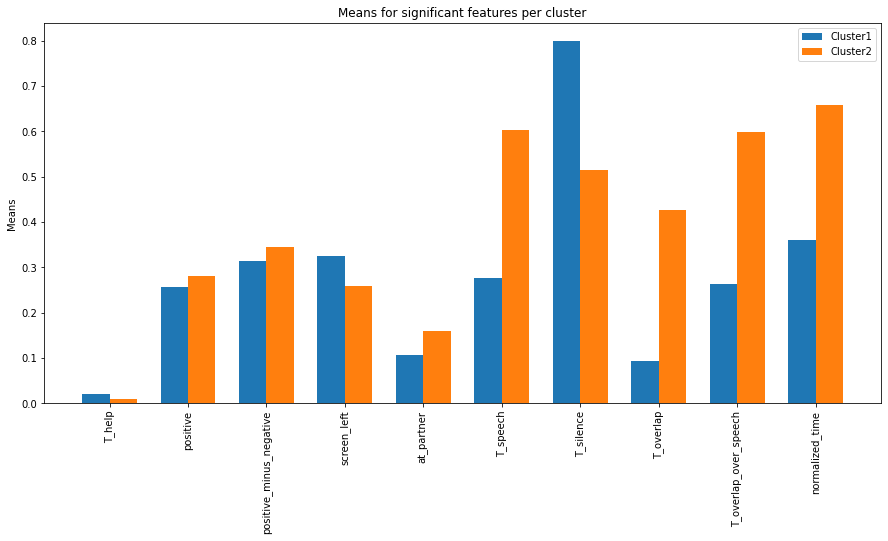

In [32]:
significant_feature12 =list(map(lambda c: c[0],list(filter(lambda pt: pt[1]<threshold,clus12))))
mean1=list()
mean2=list()
for ft in significant_feature12:
    mean1.append(mk[ft][1])
    mean2.append(mk[ft][2])
x = np.arange(len(significant_feature12))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,7))
rects1 = ax.bar(x - width/2, mean1, width, label='Cluster1')
rects2 = ax.bar(x + width/2, mean2, width, label='Cluster2')

ax.set_ylabel('Means')
ax.set_title('Means for significant features per cluster')
ax.set_xticks(x)
ax.set_xticklabels(significant_feature12)
plt.xticks(rotation=90)
ax.legend()


plt.show()

## HMM

In [33]:
from hmmlearn import hmm

In [34]:
## For each team the set of observations is a sequence
## So we have #teams sequences with #dp_per_team emissions
## label and team_n should be dropped and obseravtions should be sorted by time
by_team = clustered_features.drop('label',axis=1).groupby('team')
lengths= by_team.count()['normalized_time'].to_numpy()
observations = by_team.get_group(14).drop('team',axis=1).to_numpy()
for name,group in by_team:
    if(name!=14):
        observations = np.concatenate([observations,group.drop('team',axis=1).to_numpy()])

In [35]:
## build HMM with 3 components and fit it to the observations
model = hmm.GMMHMM(n_components=3,covariance_type='spherical')
model = model.fit(observations,lengths)

In [36]:
## Indicates whether the model has converged
print(model.monitor_.converged)
model.monitor_.report

True


<bound method ConvergenceMonitor.report of ConvergenceMonitor(
    history=[-122728.5272891288, 12802.840982604568, 12757.672061432324],
    iter=3,
    n_iter=10,
    tol=0.01,
    verbose=False,
)>

In [37]:
## Initial state occupation distribution.
model.startprob_

array([1.00000000e+000, 1.83724340e-115, 1.38907447e-222])

In [38]:
## Matrix of transition probabilities between states.
model.transmat_

array([[0.59341273, 0.15795518, 0.24863208],
       [0.13525785, 0.65011322, 0.21462893],
       [0.30510679, 0.29254815, 0.40234506]])

In [39]:
## Mixture weights for each state.
model.weights_

array([[1.],
       [1.],
       [1.]])

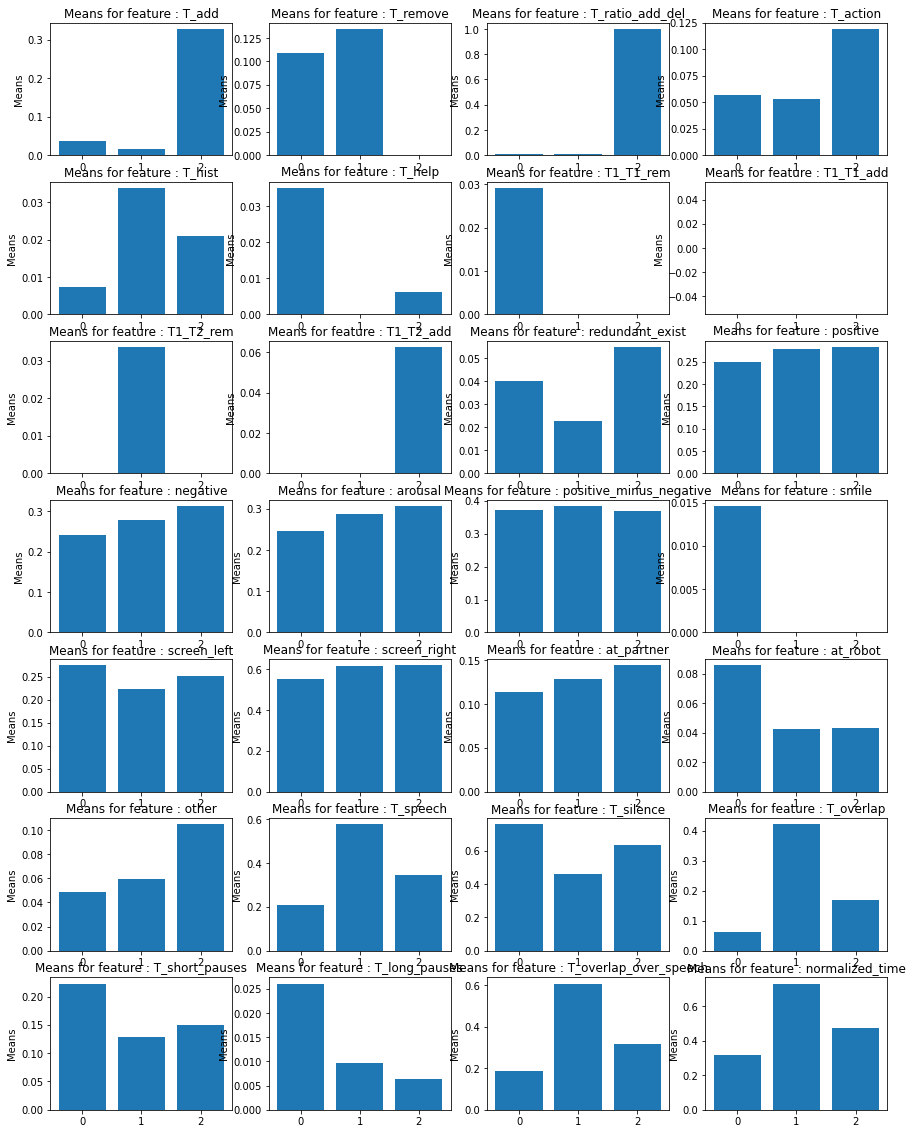

In [40]:
states= list(range(3))
## Mean parameters for each mixture component in each state.
fig, axs = plt.subplots(7, 4,figsize=(15,20))
for i in range(len(model.means_[0][0])):
    axs[i//4,i%4].bar(states,model.means_[:,0,i])
    axs[i//4,i%4].set_ylabel('Means')
    axs[i//4,i%4].set_title('Means for feature : '+columns[i])
plt.show()

In [42]:
## Covariance parameters for each mixture components in each state.
model.covars_

array([[0.01980482],
       [0.01713796],
       [0.01983767]])

In [43]:
## predict each dp state
states=[]
for name,group in by_team :
    obs= group.drop('team',axis=1).to_numpy()
    states =  np.concatenate([states,model.predict(obs,lengths=[obs.shape[0]])])
states_dis= pd.DataFrame(std_features).assign(state=pd.Series(states).values)
states_dis = states_dis.groupby('state')

In [44]:
state0 = states_dis.get_group(0)
state1 = states_dis.get_group(1)
state2 = states_dis.get_group(2)


In [45]:
# Kruskal-Wallis Test
pvalues01 = []
pvalues02= []
pvalues12 = []
pvalues012=[]
for feature in columns:
    try:
        pvalues01.append(kruskal(state0[feature],state1[feature]).pvalue)
    except:
        pvalues01.append(None)
    try :
        pvalues02.append(kruskal(state0[feature],state2[feature]).pvalue)
    except :
        pvalues02.append(None)
    try:
        pvalues12.append(kruskal(state1[feature],state2[feature]).pvalue)
    except:
        pvalues12.append(None)
    try:
        pvalues012.append(kruskal(state0[feature],state1[feature],state2[feature]).pvalue)
    except:
        pvalues012.append(None)
tests_df = pd.DataFrame(index=columns).assign(pvalue_01=pd.Series(pvalues01).values).assign(pvalue_02=pd.Series(pvalues02).values)
tests_df = tests_df.assign(pvalue_12=pd.Series(pvalues12).values).assign(pvalue_012=pd.Series(pvalues012).values)
tests_df = tests_df.assign(mean_0=pd.Series(model.means_[0][0]).values).assign(mean_1=pd.Series(model.means_[1][0]).values)
tests_df = tests_df.assign(mean_2=pd.Series(model.means_[2][0]).values)
tests_df=tests_df.sort_values('pvalue_012')
tests_df

,pvalue_01,pvalue_02,pvalue_12,pvalue_012,mean_0,mean_1,mean_2
T_ratio_add_del,4.589301e-01,5.220515e-122,6.663973e-130,5.535321e-183,1.312014e-02,6.729559e-03,9.999978e-01
T_add,4.577846e-01,6.010859e-100,2.610590e-114,2.388349e-160,3.644306e-02,1.682390e-02,3.281263e-01
T_overlap,5.892624e-97,7.100573e-18,9.712381e-31,2.760344e-98,6.135501e-02,4.213296e-01,1.679682e-01
T_speech,8.477783e-90,2.493802e-20,7.562644e-23,1.735427e-89,2.082582e-01,5.755465e-01,3.460734e-01
T_overlap_over_speech,7.595498e-72,3.505213e-11,6.190938e-30,1.645284e-75,1.891342e-01,6.084412e-01,3.170220e-01
T_silence,3.187753e-70,1.142510e-13,2.080269e-19,4.649497e-69,7.586753e-01,4.604999e-01,6.372338e-01
T_action,1.056353e-01,3.188625e-32,1.079551e-44,3.200090e-49,5.638728e-02,5.272196e-02,1.191416e-01
normalized_time,1.518080e-46,3.510905e-09,5.506350e-15,2.159810e-46,3.157809e-01,7.326249e-01,4.738481e-01
T_remove,6.971572e-01,1.116435e-11,6.037973e-11,1.127712e-10,1.092886e-01,1.347397e-01,1.552110e-06
redundant_exist,3.512804e-01,1.635185e-06,3.081867e-09,1.046462e-09,3.997135e-02,2.257087e-02,5.468935e-02


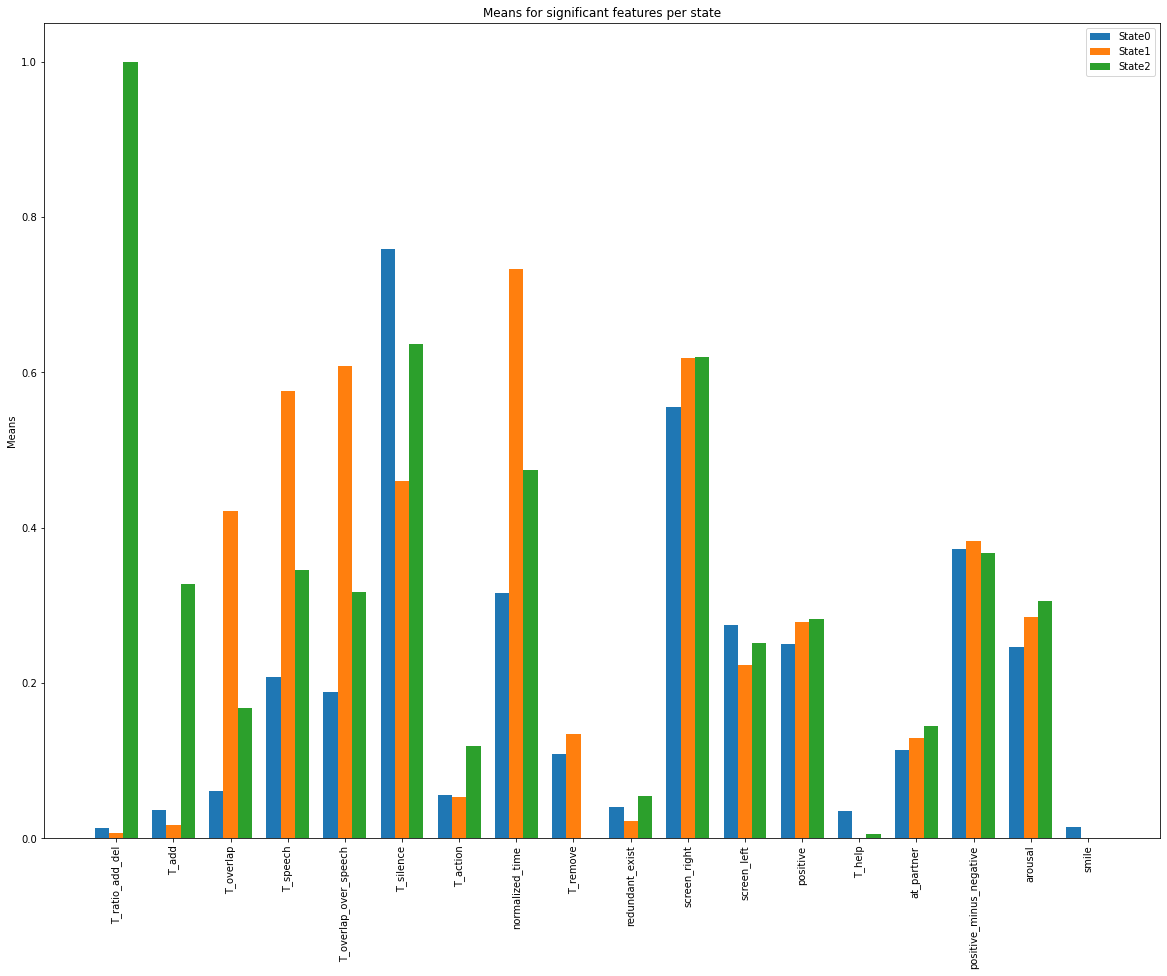

In [47]:
filtered= tests_df[tests_df['pvalue_012']<0.01]
significant = filtered.index.to_list()
mean0=filtered['mean_0'].to_list()
mean1=filtered['mean_1'].to_list()
mean2=filtered['mean_2'].to_list()

x = np.arange(len(significant))
x=x+0.5
width = 0.25 

fig, ax = plt.subplots(figsize=(20,15))
rects1 = ax.bar(x - width, mean0, width, label='State0')
rects1 = ax.bar(x , mean1, width, label='State1')
rects2 = ax.bar(x + width, mean2, width, label='State2')

ax.set_ylabel('Means')
ax.set_title('Means for significant features per state')
ax.set_xticks(x)
ax.set_xticklabels(significant)
plt.xticks(rotation=90)
ax.legend()


plt.show()


In [49]:
import graphviz as gr

In [50]:
log=columns[:11]
video=columns[11:21]
audio=columns[21:-1]
sort_by=filtered.index.map(lambda x: 0 if(x in log) else (1 if(x in video) else (2 if(x in audio) else 3)))
graph = filtered.assign(sort_by=sort_by)
graph=graph.sort_values('sort_by',axis=0)
graph=graph.drop('smile',axis=0)
description = ['''Highest''','''High''','''Medium''','''Low''','''Lowest''']
mean0=graph['mean_0'].to_list()
mean1=graph['mean_1'].to_list()
mean2=graph['mean_2'].to_list()
means=[mean0,mean1,mean2]
significant=graph.index.to_list()
colors= ['''''','''''','''''']

In [51]:
#Generate state description
# Highest Value for each feature is marked with highest, same for lowest
# the remaining value is High, Medium, Low based on its distance from the min and the max
states_des=[["","",""],["","",""],["","",""],["","",""]]
new_des=["","",""]
i=0
for ft in significant:
    max_value= max(means[0][i],means[1][i],means[2][i])
    min_value=min(means[0][i],means[1][i],means[2][i])
    for j in range(3):
        if(means[j][i]==max_value):
            new_des[j]= "{:<30}".format(ft) +'\t'+ description[0] +"<br/>"
        elif(((means[j][i]-min_value)/(max_value-min_value))>2/3):
            new_des[j]= "{:<30}".format(ft) +'\t'+ description[1] +"<br/>"
        elif (((means[j][i]-min_value)/(max_value-min_value))>1/3):
            new_des[j]= "{:<30}".format(ft) +'\t'+ description[2] +"<br/>"
        elif(means[j][i]==min_value):
            new_des[j]= "{:<30}".format(ft) +'\t'+ description[4] +"<br/>"
        else:
            new_des[j]= "{:<30}".format(ft)+'\t'+ description[3] +"<br/>"
    if not(new_des[0]==new_des[1] and new_des[0]==new_des[2] and new_des[2]==new_des[1]):
        for j in range(3):
            states_des[graph.loc[ft,'sort_by']][j]+=new_des[j]
    i+=1

In [54]:
G= gr.Digraph('NonGainersHMMStateDiagram',format='jpeg')
G.attr('graph',pad='1',ranksep='1',nodesep='1')
prob="{proba:.2e}"

widths= [0.6,0.6,0.6]
widths[np.argmin(model.startprob_)] = 0.5
widths[np.argmax(model.startprob_)]=10

G.attr('node',color='red')
G.node('0.0','''<<font color="blue">''' + states_des[0][0]+'''</font>'''\
       +'''<font color="#1d8348">'''+ states_des[1][0]+'''</font>'''\
       +'''<font color="orange">'''+ states_des[2][0]+'''</font>'''\
       '''<font color="black">'''+ states_des[3][0]+'''</font>>''',shape='box')

G.node('1.0','''<<font color="blue">''' + states_des[0][1]+'''</font>'''\
       +'''<font color="#1d8348">'''+ states_des[1][1]+'''</font>'''\
       +'''<font color="orange">'''+ states_des[2][1]+'''</font>'''\
       '''<font color="black">'''+ states_des[3][1]+'''</font>>''',shape='box')

G.node('2.0','''<<font color="blue">''' + states_des[0][2]+'''</font>'''\
       +'''<font color="#1d8348">'''+ states_des[1][2]+'''</font>'''\
       +'''<font color="orange">'''+ states_des[2][2]+'''</font>'''\
       '''<font color="black">'''+ states_des[3][2]+'''</font>>''',shape='box')

G.attr('node',penwidth=str(widths[0]))
G.node('0','State 0\n\nInitial state probability: '+prob.format(proba=model.startprob_[0]))
G.attr('node',penwidth=str(widths[1]))
G.node('1','State 1\n\nInitial state probability: '+prob.format(proba=model.startprob_[1]))
G.attr('node',penwidth=str(widths[2]))
G.node('2','State 2\n\nInitial state probability: '+prob.format(proba=model.startprob_[2]))


prob="{proba:.3f}"
G.attr('edge',penwidth=str(10*model.transmat_[0][0]))
G.edge('0','0',prob.format(proba=model.transmat_[0][0]))
G.attr('edge',penwidth=str(10*model.transmat_[0][1]))
G.edge('0','1',prob.format(proba=model.transmat_[0][1]))
G.attr('edge',penwidth=str(10*model.transmat_[0][2]))
G.edge('0','2',prob.format(proba=model.transmat_[0][2]))

G.attr('edge',penwidth=str(10*model.transmat_[1][0]))
G.edge('1','0',prob.format(proba=model.transmat_[1][0]))
G.attr('edge',penwidth=str(10*model.transmat_[1][1]))
G.edge('1','1',prob.format(proba=model.transmat_[1][1]))
G.attr('edge',penwidth=str(10*model.transmat_[1][2]))
G.edge('1','2',prob.format(proba=model.transmat_[1][2]))

G.attr('edge',penwidth=str(10*model.transmat_[2][0]))
G.edge('2','0',prob.format(proba=model.transmat_[2][0]))
G.attr('edge',penwidth=str(10*model.transmat_[2][1]))
G.edge('2','1',prob.format(proba=model.transmat_[2][1]))
G.attr('edge',penwidth=str(10*model.transmat_[2][2]))
G.edge('2','2',prob.format(proba=model.transmat_[2][2]))

G.attr('edge',penwidth=str(1))
G.attr('edge',fontcolor='red')
G.attr('edge',dir='none')
G.attr('edge',color='red')
G.edge('0','0.0','Key Features')
G.edge('1','1.0','Key Features')
G.edge('2','2.0','Key Features')
G.graph_attr.update(size="15,12")

G.view()




'NonGainersHMMStateDiagram.gv.jpeg'